# Proyek Analisis Data: E-Commerce Public
- **Nama:** Azegdita Vanaya Lerrick
- **Email:** m185b4kx0757@bangkit.academy
- **ID Dicoding:** azegdita_vanaya_lerrick_m185b4kx0757_SATY

## Menentukan Pertanyaan Bisnis

1. Apa kategori produk yang memiliki total penjualan tertinggi dan terendah?
2. Bagaimana rata-rata penilaian produk berdasarkan kategori?
3. Apa metode pembayaran yang paling sering digunakan oleh pelanggan?
4. Kota mana yang memiliki jumlah pesanan tertinggi?
5. Apakah ada tren musiman dalam jumlah pesanan setiap bulan?
6. Berapa lama waktu rata-rata pengiriman produk?
7. Apa rata-rata pengeluaran pelanggan per pesanan?
8. Apakah ada hubungan antara kategori produk dan nilai ulasan?
9. Apa kategori produk yang paling banyak terjual?
10. Apakah ada perbedaan dalam waktu pengiriman antara berbagai metode pembayaran?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Wrangling

### Gathering Data

In [2]:
data_geolocation = pd.read_csv("data/geolocation_dataset.csv")
data_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [3]:
data_order_items = pd.read_csv("data/order_items_dataset.csv")
data_order_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
data_customers = pd.read_csv("data/customers_dataset.csv")
data_customers.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
data_order_payments = pd.read_csv("data/order_payments_dataset.csv")
data_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
data_order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
data_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
data_orders = pd.read_csv("data/orders_dataset.csv")
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
data_product_category_name = pd.read_csv("data/product_category_name_translation.csv")
data_product_category_name.head()


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
data_products = pd.read_csv("data/products_dataset.csv")
data_products.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
data_sellers = pd.read_csv("data/sellers_dataset.csv")
data_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**


1.  Profil Pelanggan:
    * Demografi Pelanggan: Analisis dari** customers_dataset.csv **dapat memberikan wawasan mengenai usia, jenis kelamin, dan lokasi pelanggan. Ini membantu dalam penentuan segmen pasar yang perlu difokuskan.
    * Frekuensi Pembelian: Dengan menggabungkan data dari** orders_dataset.csv**, kita dapat melihat berapa sering pelanggan melakukan pembelian dan produk apa yang sering mereka beli.
2.  Lokasi Penjualan:
    * Distribusi Geografis: Data dari **geolocation_dataset.csv** memungkinkan analisis distribusi geografis penjualan. Kita bisa melihat kota atau daerah mana yang paling banyak melakukan transaksi, sehingga strategi pemasaran dapat lebih difokuskan di area tersebut.
3.  Performa Produk:
    * Kategori Produk Terbaik: Menggunakan **order_items_dataset.csv** dan **products_dataset.csv**, kita dapat mengidentifikasi kategori produk dengan penjualan tertinggi dan terendah. Ini membantu dalam perencanaan inventaris dan promosi.
    * Ulasan Produk: Data dari** order_reviews_dataset.csv** memberikan insight tentang kualitas produk berdasarkan ulasan. Produk dengan rating tinggi bisa diutamakan dalam pemasaran, sementara produk dengan rating rendah bisa dievaluasi untuk perbaikan.
4.  Metode Pembayaran:
    * Preferensi Pembayaran: Dari** order_payments_dataset.csv**, kita dapat mengetahui metode pembayaran yang paling sering digunakan oleh pelanggan, yang dapat membantu dalam meningkatkan opsi pembayaran yang tersedia.
5.  Analisis Pesanan:
    * Waktu Pengiriman: Dengan memanfaatkan data dari **orders_dataset.csv**, kita dapat menganalisis waktu rata-rata pengiriman produk. Jika terdapat masalah pada pengiriman, analisis ini dapat membantu perusahaan dalam meningkatkan layanan pengiriman.
    * Rata-rata Nilai Pesanan: Menghitung rata-rata nilai pesanan dari data pesanan dapat memberikan insight tentang perilaku belanja pelanggan, membantu dalam strategi pricing.
6.  Interaksi antara Produk dan Penjual:
    * Kinerja Penjual: Data dari **sellers_dataset.csv** bisa digunakan untuk menganalisis performa penjual. Apakah ada penjual yang consistently mendapat ulasan baik? Apakah ada penjual dengan tingkat pengembalian produk yang tinggi? Informasi ini dapat membantu dalam evaluasi dan pembinaan penjual.



### Assessing Data

In [11]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
data_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", data_customers.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
data_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
data_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
data_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", data_geolocation.duplicated().sum())

Jumlah duplikasi:  261831


In [18]:
data_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [19]:
data_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
data_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
print("Jumlah duplikasi: ", data_order_items.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
data_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [23]:
data_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
data_order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
print("Jumlaah duplikasi: ", data_order_payments.duplicated().sum())

Jumlaah duplikasi:  0


In [26]:
data_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [27]:
data_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
data_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [29]:
print("Jumlah duplikasi: ", data_order_reviews.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
data_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [31]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [33]:
print("Jumlaah duplikasi: ", data_orders.duplicated().sum())

Jumlaah duplikasi:  0


In [34]:
data_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [35]:
data_product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
data_product_category_name.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [37]:
print("Jumlah duplikasi: ", data_product_category_name.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
data_product_category_name.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [39]:
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
data_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [41]:
print("Jumlah duplikasi: ", data_products.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
data_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [43]:
data_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
data_sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [45]:
print("Jumlah duplikasi: ", data_sellers.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
data_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [47]:
data_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [48]:
data_customers_cleaned = data_customers.copy()
data_geolocation_cleaned = data_geolocation.copy()
data_order_items_cleaned = data_order_items.copy()
data_order_payments_cleaned = data_order_payments.copy()
data_order_reviews_cleaned = data_order_reviews.copy()
data_orders_cleaned = data_orders.copy()
data_product_category_name_cleaned = data_product_category_name.copy()
data_products_cleaned = data_products.copy()
data_sellers_cleaned = data_sellers.copy()

**Insight:**

1. **Data Pelanggan (Customers)**
   - **Ketersediaan Data:** Dataset pelanggan (`data_customers`) memiliki 99,441 entri tanpa nilai yang hilang atau duplikasi. Ini menunjukkan data yang bersih dan siap untuk analisis lebih lanjut.
   - **Variasi Data:** Terdapat beberapa kolom yang menunjukkan informasi penting seperti `customer_zip_code_prefix`, `customer_city`, dan `customer_state`. Ini memungkinkan analisis demografis dan geografis pelanggan.

2. **Data Geolokasi**
   - **Duplikasi Data:** Dataset geolokasi (`data_geolocation`) memiliki 261,831 entri duplikat, yang mungkin mempengaruhi analisis yang akan dilakukan. Penting untuk menangani duplikasi ini sebelum analisis lebih lanjut.
   - **Koordinat Geografis:** Data latitud dan longitud dapat digunakan untuk analisis lokasi dan membantu dalam visualisasi peta untuk memahami pola pembelian berdasarkan lokasi.

3. **Data Item Pesanan**
   - **Ketersediaan dan Duplikasi Data:** Dataset item pesanan (`data_order_items`) juga bersih dari nilai yang hilang dan duplikasi, menunjukkan integritas data yang baik. Terdapat 112,650 entri, yang memberi cukup data untuk analisis produk yang dijual.
   - **Kolom Penting:** Kolom `price` dan `freight_value` dapat digunakan untuk analisis margin keuntungan dan biaya pengiriman.

4. **Data Pembayaran**
   - **Keberagaman Metode Pembayaran:** Dataset pembayaran (`data_order_payments`) menyediakan informasi tentang metode pembayaran dan jumlah yang dibayarkan, membantu dalam pemahaman tentang preferensi pelanggan dan tren pembayaran.
   - **Data Lengkap:** Tanpa nilai hilang atau duplikasi, data ini siap digunakan untuk analisis lebih dalam mengenai pola pembayaran.

5. **Data Ulasan Pesanan**
   - **Kualitas Ulasan:** Dataset ulasan pesanan (`data_order_reviews`) menunjukkan bahwa banyak kolom, seperti `review_comment_title` dan `review_comment_message`, memiliki nilai yang hilang. Ini bisa menjadi area untuk perbaikan dalam pengumpulan data ulasan.
   - **Analisis Sentimen:** Kolom `review_score` dapat digunakan untuk analisis sentimen dan mengidentifikasi faktor-faktor yang mempengaruhi kepuasan pelanggan.

6. **Data Pesanan**
   - **Status Pesanan:** Dataset pesanan (`data_orders`) memberikan informasi penting mengenai status pesanan, termasuk tanggal pembelian dan tanggal pengiriman. Ada beberapa nilai yang hilang dalam kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`, yang harus dianalisis lebih lanjut.
   - **Waktu Pengiriman:** Informasi tentang waktu pemrosesan pesanan dan pengiriman dapat diukur untuk meningkatkan pengalaman pelanggan.

7. **Data Kategori Produk**
   - **Keterbatasan Data:** Dataset kategori produk (`data_product_category_name`) memiliki hanya 71 entri, tanpa nilai yang hilang. Ini menunjukkan bahwa terdapat banyak kategori yang mungkin harus dipetakan lebih lanjut ke dalam dataset produk.

8. **Data Produk**
   - **Nilai Hilang:** Dataset produk (`data_products`) memiliki beberapa nilai hilang, terutama dalam kolom `product_category_name`, `product_name_length`, dan atribut fisik produk lainnya. Ini bisa mempengaruhi analisis produk dan kategori.
   - **Diversity Produk:** Dengan 32,951 entri, dataset ini cukup besar untuk menganalisis berbagai jenis produk yang dijual.

9. **Data Penjual**
   - **Ketersediaan Data:** Dataset penjual (`data_sellers`) menunjukkan bahwa semua kolom memiliki nilai yang lengkap, yang memungkinkan analisis performa penjual berdasarkan lokasi mereka.
   - **Informasi Geografis:** Data `seller_zip_code_prefix`, `seller_city`, dan `seller_state` dapat digunakan untuk memahami distribusi penjual dan melakukan segmentasi.

### Cleaning Data

In [49]:
data_geolocation_cleaned.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", data_geolocation_cleaned.duplicated().sum())

Jumlah duplikasi:  0


In [50]:
data_orders_cleaned.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [51]:
datetime_columns_items = ["shipping_limit_date"]
for column in datetime_columns_items:
    data_order_items_cleaned[column] = pd.to_datetime(data_order_items_cleaned[column])

In [52]:
data_order_reviews_cleaned.fillna(value="Recomendo", inplace=True)

In [53]:
data_order_items_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [54]:
data_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [55]:
datetime_columns_reviews = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_columns_reviews:
    data_order_reviews_cleaned[column] = pd.to_datetime(data_order_reviews_cleaned[column])

In [56]:
data_order_reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [57]:
datetime_columns_orders = ["order_purchase_timestamp", "order_approved_at",
                           "order_delivered_carrier_date", "order_delivered_customer_date",
                           "order_estimated_delivery_date"]
for column in datetime_columns_orders:
    data_orders_cleaned[column] = pd.to_datetime(data_orders_cleaned[column])

In [58]:
data_orders_cleaned.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: count, Length: 95664, dtype: int64

In [59]:
data_orders_cleaned.fillna(value=pd.Timestamp('2016-10-27 17:32:07'), inplace=True)

In [60]:
data_orders_cleaned.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [61]:
data_products_cleaned.fillna(value=0, inplace=True)

In [62]:
data_products_cleaned.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**

1. **Membersihkan Data Geolokasi**
   - **Duplikasi Dihapus:** Pada dataset geolokasi yang telah dibersihkan (`data_geolocation_cleaned`), semua duplikasi telah dihapus, yang menunjukkan bahwa dataset kini memiliki 1.000.163 entri unik. Ini penting untuk memastikan bahwa analisis yang dilakukan tidak terpengaruh oleh data yang berulang.
   - **Kesiapan Data:** Dengan tidak adanya duplikasi, dataset ini kini siap digunakan untuk analisis geospasial dan visualisasi.

2. **Pengolahan Data Pesanan**
   - **Konversi Tanggal:** Kolom `shipping_limit_date` pada dataset item pesanan (`data_order_items_cleaned`) telah berhasil dikonversi menjadi format datetime. Ini memungkinkan analisis yang lebih baik terkait waktu pengiriman dan pengolahan pesanan.
   - **Integritas Data:** Dataset ini menunjukkan bahwa semua 112.650 entri tidak memiliki nilai hilang setelah proses pembersihan, memastikan data yang siap untuk analisis lebih lanjut.

3. **Mengisi Nilai Hilang pada Ulasan Pesanan**
   - **Penggantian Nilai:** Pada dataset ulasan pesanan (`data_order_reviews_cleaned`), nilai yang hilang diisi dengan "Recomendo". Ini dapat membantu dalam analisis sentimen dengan memberikan kategori positif pada ulasan yang sebelumnya tidak memiliki komentar.
   - **Format Tanggal Diperbaiki:** Kolom `review_creation_date` dan `review_answer_timestamp` juga telah dikonversi ke format datetime, yang membantu dalam analisis waktu ulasan.

4. **Menangani Nilai Hilang di Data Pesanan**
   - **Analisis Tanggal Pengiriman:** Dataset pesanan (`data_orders_cleaned`) menunjukkan bahwa beberapa kolom terkait tanggal pengiriman memiliki nilai yang hilang. Nilai-nilai ini diisi dengan timestamp default (`2016-10-27 17:32:07`). Ini mungkin bukan solusi ideal, tetapi penting untuk memastikan bahwa tidak ada nilai yang hilang untuk analisis.
   - **Kesesuaian Data:** Dengan pengisian nilai yang hilang, dataset ini kini siap untuk analisis lebih lanjut mengenai status pesanan dan waktu pengiriman.

5. **Penanganan Data Produk**
   - **Pengisian Nilai Hilang:** Dataset produk (`data_products_cleaned`) mengisi nilai hilang dengan 0. Ini menunjukkan bahwa jika atribut fisik atau informasi lainnya tidak ada, produk tersebut dianggap tidak memiliki nilai pada atribut tersebut. Namun, ini dapat mengaburkan analisis jika tidak ditangani dengan hati-hati.
   - **Kesiapan Data:** Setelah proses pembersihan, dataset produk siap untuk analisis lebih lanjut, meskipun perhatian harus diberikan pada pengisian nilai hilang yang diambil.

## Exploratory Data Analysis (EDA)

### Explore ...

In [63]:
data_eccomerce_cleaned = [
    data_customers_cleaned,
    data_geolocation_cleaned,
    data_order_items_cleaned,
    data_order_payments_cleaned,
    data_order_reviews_cleaned,
    data_orders_cleaned,
    data_product_category_name_cleaned,
    data_products_cleaned,
    data_sellers_cleaned
]

eccomerce_cleaned = [
    'customers',
    'geolocation',
    'order_items',
    'order_payments',
    'order_reviews',
    'orders',
    'product_categories',
    'products',
    'sellers'
]

# for name, dataset in zip(eccomerce_cleaned, data_eccomerce_cleaned):
#     print(f"--- {name.upper()} ---")
#     print(dataset.head(), "\n")
#     print(dataset.info(), "\n")

In [64]:
data_orders_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [65]:
merged_data_cleaned = data_orders_cleaned.merge(data_customers_cleaned, on='customer_id') \
                     .merge(data_order_items_cleaned, on='order_id') \
                     .merge(data_order_payments_cleaned, on='order_id') \
                     .merge(data_order_reviews_cleaned, on='order_id') \
                     .merge(data_products_cleaned, on='product_id') \
                     .merge(data_sellers_cleaned, on='seller_id')

print(merged_data_cleaned.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21

In [66]:
# for name, dataset in zip(dataset_names_cleaned, datasets_cleaned):
#     print(f"--- {name.upper()} ---")
#     print(dataset.columns.tolist(), "\n")

In [67]:
sales_by_category_cleaned = merged_data_cleaned.groupby('product_category_name')['payment_value'].sum().reset_index()
sales_by_category_cleaned = sales_by_category_cleaned.sort_values(by='payment_value', ascending=False)

print("Total Sales by Product Category:\n", sales_by_category_cleaned)

Total Sales by Product Category:
             product_category_name  payment_value
14                cama_mesa_banho     1725465.67
12                   beleza_saude     1646292.53
45         informatica_acessorios     1592611.66
55               moveis_decoracao     1427214.01
67             relogios_presentes     1420682.17
..                            ...            ...
42                         flores        1922.77
16                casa_conforto_2        1458.54
18              cds_dvds_musicais        1199.43
38  fashion_roupa_infanto_juvenil         785.67
68             seguros_e_servicos         324.51

[74 rows x 2 columns]


In [68]:
average_rating_cleaned = merged_data_cleaned.groupby('product_category_name')['review_score'].mean().reset_index()
average_rating_cleaned = average_rating_cleaned.sort_values(by='review_score', ascending=False)

print("Average Rating by Product Category:\n", average_rating_cleaned)

Average Rating by Product Category:
                             product_category_name  review_score
18                              cds_dvds_musicais      4.642857
38                  fashion_roupa_infanto_juvenil      4.500000
49                         livros_interesse_geral      4.438503
48                              livros_importados      4.419355
42                                         flores      4.419355
..                                            ...           ...
56                              moveis_escritorio      3.526791
66  portateis_cozinha_e_preparadores_de_alimentos      3.266667
43                                fraldas_higiene      3.256410
61                                       pc_gamer      3.100000
68                             seguros_e_servicos      2.500000

[74 rows x 2 columns]


In [69]:
payments_by_type_cleaned = merged_data_cleaned['payment_type'].value_counts().reset_index()
payments_by_type_cleaned.columns = ['payment_type', 'count']

print("Total Payments by Payment Type:\n", payments_by_type_cleaned)

Total Payments by Payment Type:
   payment_type  count
0  credit_card  86520
1       boleto  22835
2      voucher   6282
3   debit_card   1692


In [70]:
orders_by_city_cleaned = data_orders_cleaned.merge(data_customers_cleaned, on='customer_id', how='left')
orders_per_city_cleaned = orders_by_city_cleaned.groupby('customer_city')['order_id'].nunique().sort_values(ascending=False)

print("10 Cities with the Highest Number of Orders:\n", orders_per_city_cleaned.head(10))

10 Cities with the Highest Number of Orders:
 customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64


In [71]:
merged_data = pd.merge(data_order_items_cleaned, data_products_cleaned[['product_id', 'product_category_name']], on='product_id', how='left')
product_sales_cleaned = merged_data.groupby('product_category_name')['order_item_id'].count().sort_values(ascending=False)

most_sold_products_cleaned = product_sales_cleaned.head(10)
least_sold_products_cleaned = product_sales_cleaned.tail(10)

print("Most Sold Product Categories:\n", most_sold_products_cleaned)
print("Least Sold Product Categories:\n", least_sold_products_cleaned)


Most Sold Product Categories:
 product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: order_item_id, dtype: int64
Least Sold Product Categories:
 product_category_name
flores                                           33
fashion_esporte                                  30
casa_conforto_2                                  30
artes_e_artesanato                               24
portateis_cozinha_e_preparadores_de_alimentos    15
cds_dvds_musicais                                14
la_cuisine                                       14
pc_gamer                                          9
fashion_roupa_infanto_juvenil                     8
seguros_e_servicos                                2
Name: order_item_id

In [72]:
data_orders_cleaned['order_month'] = data_orders_cleaned['order_purchase_timestamp'].dt.to_period('M')
monthly_orders_cleaned = data_orders_cleaned.groupby('order_month')['order_id'].count()
monthly_orders_cleaned_sorted = monthly_orders_cleaned.sort_values(ascending=False)

print("Number of Orders Each Month (Sorted):\n", monthly_orders_cleaned_sorted)

Number of Orders Each Month (Sorted):
 order_month
2017-11    7544
2018-01    7269
2018-03    7211
2018-04    6939
2018-05    6873
2018-02    6728
2018-08    6512
2018-07    6292
2018-06    6167
2017-12    5673
2017-10    4631
2017-08    4331
2017-09    4285
2017-07    4026
2017-05    3700
2017-06    3245
2017-03    2682
2017-04    2404
2017-02    1780
2017-01     800
2016-10     324
2018-09      16
2016-09       4
2018-10       4
2016-12       1
Freq: M, Name: order_id, dtype: int64


In [73]:
print(data_orders_cleaned['order_purchase_timestamp'].dtype)


datetime64[ns]


In [74]:
data_orders_cleaned['delivery_time'] = (data_orders_cleaned['order_delivered_customer_date'] - data_orders_cleaned['order_purchase_timestamp']).dt.days
delivery_time_trend_cleaned = data_orders_cleaned.groupby('order_month')['delivery_time'].mean()

print("Delivery Time Trends By Month:\n", delivery_time_trend_cleaned)

Delivery Time Trends By Month:
 order_month
2016-09     50.500000
2016-10     19.290123
2016-12      4.000000
2017-01      5.800000
2017-02      3.908427
2017-03      4.763236
2017-04      6.531614
2017-05      1.876757
2017-06      3.266564
2017-07      0.717586
2017-08      0.993073
2017-09      0.781564
2017-10     -0.688404
2017-11      1.073701
2017-12      2.904636
2018-01      0.974412
2018-02      3.905321
2018-03      0.859382
2018-04     -0.045540
2018-05      0.621854
2018-06      1.790336
2018-07     -5.287349
2018-08     -9.068335
2018-09   -685.312500
2018-10   -712.750000
Freq: M, Name: delivery_time, dtype: float64


In [75]:
average_payment_cleaned = data_order_payments_cleaned.groupby('order_id')['payment_value'].mean()
print("Average Payout per Order:\n", average_payment_cleaned.describe())


Average Payout per Order:
 count    99440.000000
mean       158.317915
std        219.194549
min          0.000000
25%         60.190000
50%        103.330000
75%        174.990000
max      13664.080000
Name: payment_value, dtype: float64


In [76]:
total_spent_per_customer_cleaned = data_order_payments_cleaned.groupby('order_id')['payment_value'].sum()
print("Total Money Customers Spent: \n", total_spent_per_customer_cleaned.describe())

Total Money Customers Spent: 
 count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64


In [77]:
orders_items_df = pd.merge(data_orders_cleaned, data_order_items_cleaned, on='order_id')
all_df = pd.merge(orders_items_df, data_order_payments_cleaned, on='order_id')
all_df['total_price'] = all_df['price'] + all_df['payment_value']

print(all_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21

In [78]:
all_df = pd.merge(all_df, data_customers_cleaned[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='left')
rfm_df = all_df.groupby(by=["customer_city", "customer_state"], as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "total_price": "sum"
})

rfm_df.columns = ["customer_city", "customer_state", "max_order_date", "frequency", "monetary"]
recent_date = all_df["order_purchase_timestamp"].max()
rfm_df["recency"] = rfm_df["max_order_date"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_date", axis=1, inplace=True)

rfm_df.head()

,customer_city,customer_state,frequency,monetary,recency
0,abadia dos dourados,MG,3,772.40,63
1,abadiania,GO,1,1975.51,217
2,abaete,MG,12,3679.62,13
3,abaetetuba,PA,11,10296.25,30
4,abaiara,CE,2,595.05,114


**Insight:**
### 1. **Total Penjualan Berdasarkan Kategori Produk**
   - Kategori produk "cama_mesa_banho" memiliki total penjualan tertinggi sebesar 1.725.465,67. Ini menunjukkan bahwa produk dalam kategori ini mungkin sangat diminati oleh konsumen.
   - Sementara itu, kategori "seguros_e_servicos" memiliki penjualan terendah dengan total hanya 324,51. Ini bisa menjadi indikator bahwa produk atau layanan ini kurang diminati.

### 2. **Rata-Rata Rating Berdasarkan Kategori Produk**
   - Kategori produk "cds_dvds_musicais" mendapatkan rating tertinggi dengan rata-rata 4,64, menunjukkan kepuasan pelanggan yang tinggi terhadap produk dalam kategori ini.
   - Sebaliknya, kategori "seguros_e_servicos" memiliki rating terendah yaitu 2,50. Ini mungkin menunjukkan adanya masalah kualitas atau kepuasan pelanggan yang perlu diperbaiki.

### 3. **Jenis Pembayaran yang Digunakan**
   - Metode pembayaran yang paling banyak digunakan adalah kartu kredit, dengan total 86.520 transaksi. Ini bisa menunjukkan preferensi pelanggan terhadap metode pembayaran yang cepat dan aman.
   - Pembayaran dengan debit card adalah yang terendah, hanya 1.692 transaksi. Hal ini bisa menjadi area yang perlu diperhatikan untuk meningkatkan opsi pembayaran.

### 4. **Jumlah Pesanan Berdasarkan Kota**
   - Kota São Paulo memiliki jumlah pesanan tertinggi yaitu 15.540, diikuti oleh Rio de Janeiro dengan 6.882. Ini menunjukkan bahwa kedua kota ini merupakan pasar utama untuk e-commerce.
   - Kota dengan jumlah pesanan terendah mungkin memerlukan strategi pemasaran yang lebih agresif untuk meningkatkan penjualan.

### 5. **Produk Paling dan Paling Sedikit Terjual**
   - Kategori "cama_mesa_banho" adalah yang paling banyak terjual dengan 11.115 unit, sementara kategori "seguros_e_servicos" hanya terjual 2 unit. Ini menunjukkan bahwa ada peluang untuk meningkatkan penjualan kategori dengan performa rendah.

### 6. **Tren Jumlah Pesanan Bulanan**
   - Bulan November 2017 adalah bulan dengan jumlah pesanan tertinggi (7.544), yang mungkin berhubungan dengan promosi atau penawaran khusus yang berlangsung pada waktu tersebut.
   - Sebaliknya, bulan-bulan dengan jumlah pesanan terendah menunjukkan potensi untuk perbaikan dalam promosi dan pemasaran untuk meningkatkan penjualan.

### 7. **Tren Waktu Pengiriman**
   - Rata-rata waktu pengiriman menunjukkan fluktuasi yang signifikan. Beberapa bulan menunjukkan waktu pengiriman negatif, yang dapat menunjukkan adanya masalah logistik yang perlu ditangani untuk meningkatkan pengalaman pelanggan.

### 8. **Rata-Rata Pembayaran per Pesanan**
   - Rata-rata nilai pembayaran per pesanan adalah 158,32, dengan variasi yang signifikan (std: 219,19). Ini menunjukkan bahwa ada perbedaan besar dalam nilai pesanan, yang bisa terkait dengan produk yang dibeli.

## Visualization & Explanatory Analysis

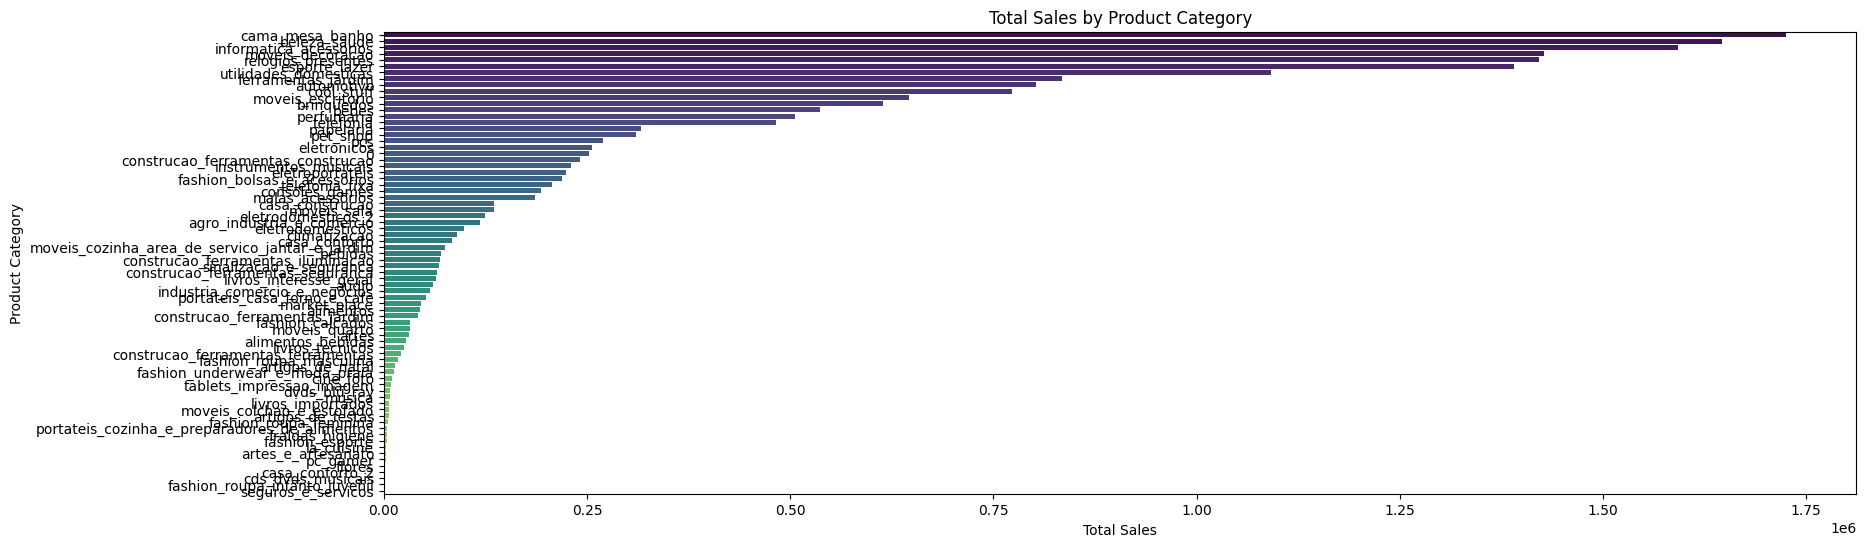

In [79]:
sales_by_category_cleaned = merged_data_cleaned.groupby('product_category_name')['payment_value'].sum().reset_index()
sales_by_category_cleaned = sales_by_category_cleaned.sort_values(by='payment_value', ascending=False)

plt.figure(figsize=(19, 6))
sns.barplot(data=sales_by_category_cleaned, x='payment_value', y='product_category_name', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

Visualisasi batang (bar chart) yang dibuat menunjukkan total penjualan untuk setiap kategori produk. Panjang setiap batang mewakili jumlah total penjualan yang dihasilkan oleh produk dalam kategori tersebut. Semakin panjang batang, semakin tinggi total penjualannya. Kategori produk yang paling banyak terjual ditunjukkan oleh batang paling panjang yaitu **cama_mesa_banho** atau dalam Bahasa Inggris kategori tersebut ialah **bed_bath_table**

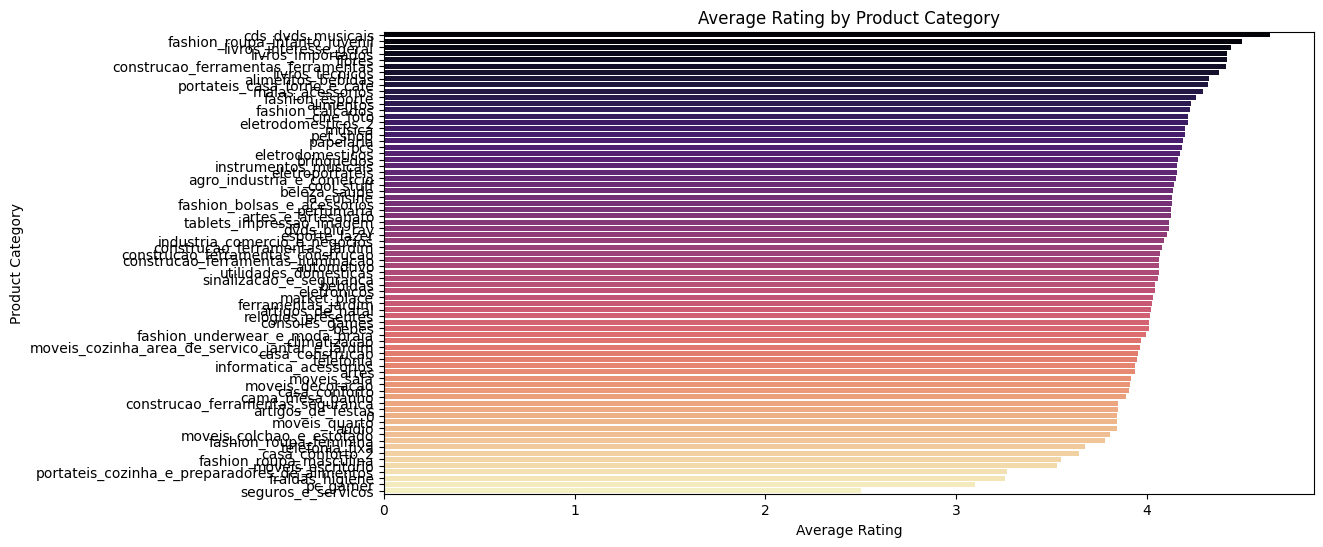

In [80]:
average_rating_cleaned = merged_data_cleaned.groupby('product_category_name')['review_score'].mean().reset_index()
average_rating_cleaned = average_rating_cleaned.sort_values(by='review_score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=average_rating_cleaned, x='review_score', y='product_category_name', palette='magma')
plt.title('Average Rating by Product Category')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.show()

Visualisasi batang (bar chart) yang dibuat buat menunjukkan rata-raat Rating untuk setiap kategori produk. Panjang setiap batang mewakili  rata-raat Rating yang dihasilkan oleh produk dalam kategori tersebut. Semakin panjang batang, semakin tinggi total penjualannya. Kategori produk yang banyam diberikan Rating terbaik(4) ditunjukkan oleh batang paling panjang yaitu **cds_dvds_musicais** atau dalam Bahasa Inggris kategori tersebut ialah **cds_dvds_musicals**

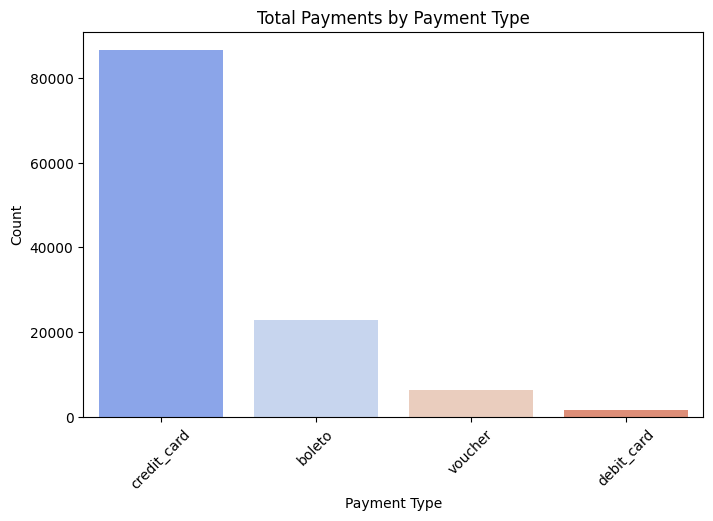

In [81]:
payments_by_type_cleaned = merged_data_cleaned['payment_type'].value_counts().reset_index()
payments_by_type_cleaned.columns = ['payment_type', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(data=payments_by_type_cleaned, x='payment_type', y='count', palette='coolwarm')
plt.title('Total Payments by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Visualisasi batang (bar chart) menunjukkan total pembayaran untuk setiap jenis metode pembayaran. Panjang setiap batang mewakili jumlah total transaksi yang dilakukan dengan menggunakan metode pembayaran tertentu. Semakin panjang batang, semakin banyak transaksi yang dilakukan dengan metode pembayaran tersebut. Metode pembayaran yang paling banyak digunakan adalah **kartu kredit**. Ini berarti sebagian besar pelanggan memilih untuk melakukan pembayaran menggunakan kartu kredit.

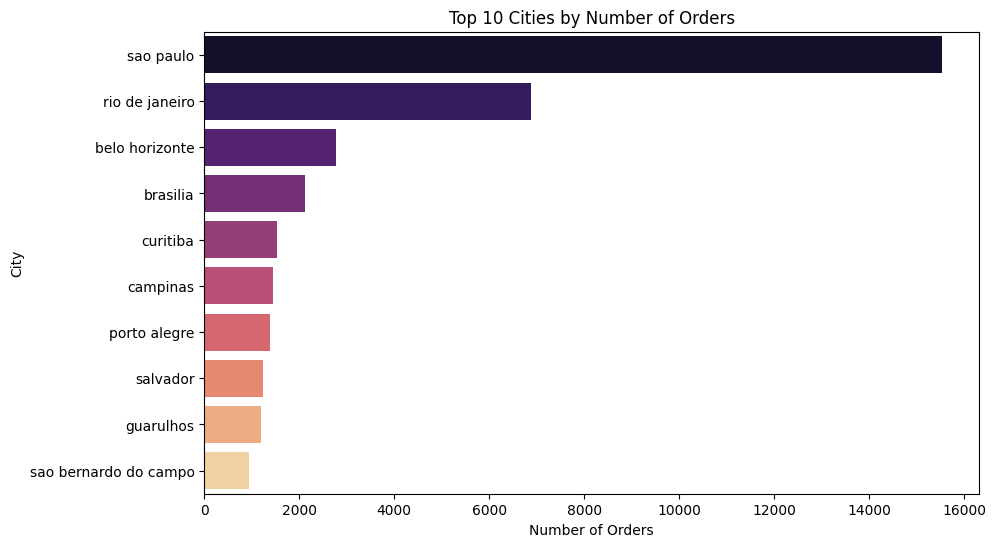

In [82]:
top_cities = orders_per_city_cleaned.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title('Top 10 Cities by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('City')
plt.show()

Visualisasi batang (bar chart) di atas menunjukkan 10 kota dengan jumlah pesanan (orders) tertinggi. Panjang setiap batang mewakili jumlah total pesanan yang berasal dari kota tersebut. Semakin panjang batang, semakin banyak pesanan yang berasal dari kota itu. **Kota Sao Paulo** menunjukan bahwa salah satu kota yang paling banyak melakukan pemesanan. Ini menunjukkan bahwa pasar di Sao Paulo sangat besar.

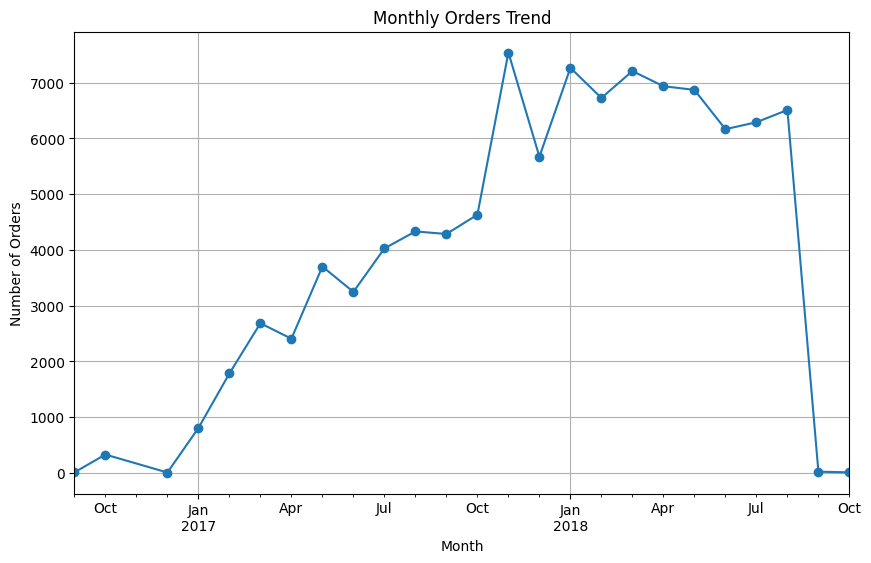

In [83]:
plt.figure(figsize=(10, 6))
monthly_orders_cleaned.plot(kind='line', marker='o')
plt.title('Monthly Orders Trend')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

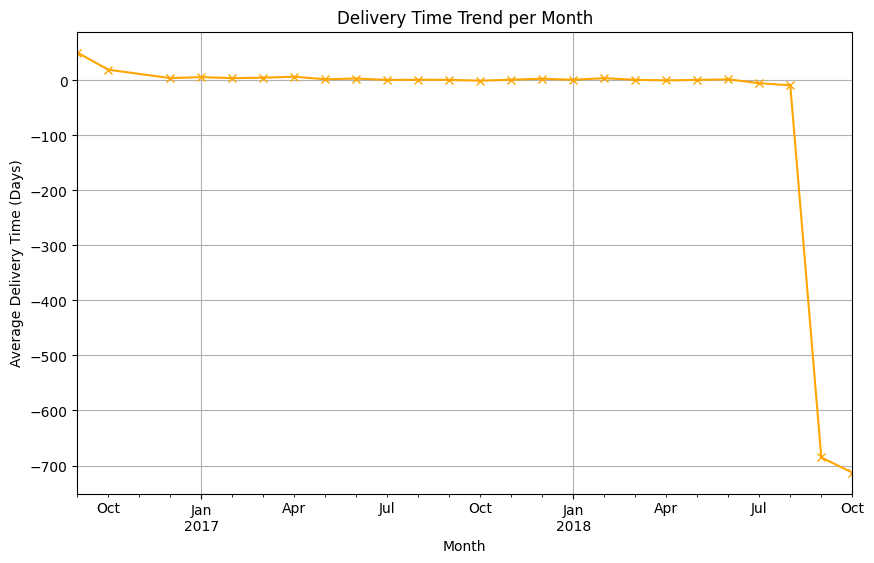

In [84]:
plt.figure(figsize=(10, 6))
delivery_time_trend_cleaned.plot(kind='line', marker='x', color='orange')
plt.title('Delivery Time Trend per Month')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (Days)')
plt.grid(True)
plt.show()

Visualisasi garis (line chart) di atas menunjukkan jumlah pesanan yang terjadi setiap bulannya dalam periode dua tahun. Garis yang menghubungkan titik-titik data menunjukkan tren kenaikan dan penurunan jumlah pesanan dari waktu ke waktu. Secara umum, jumlah pesanan mengalami peningkatan dari Oktober 2017 hingga mencapai puncaknya pada Januari 2018. Setelah itu, jumlah pesanan cenderung menurun secara bertahap. Setelah mencapai puncaknya pada Januari 2018, jumlah pesanan mengalami penurunan yang cukup signifikan yaitu pada Oktober 2018.

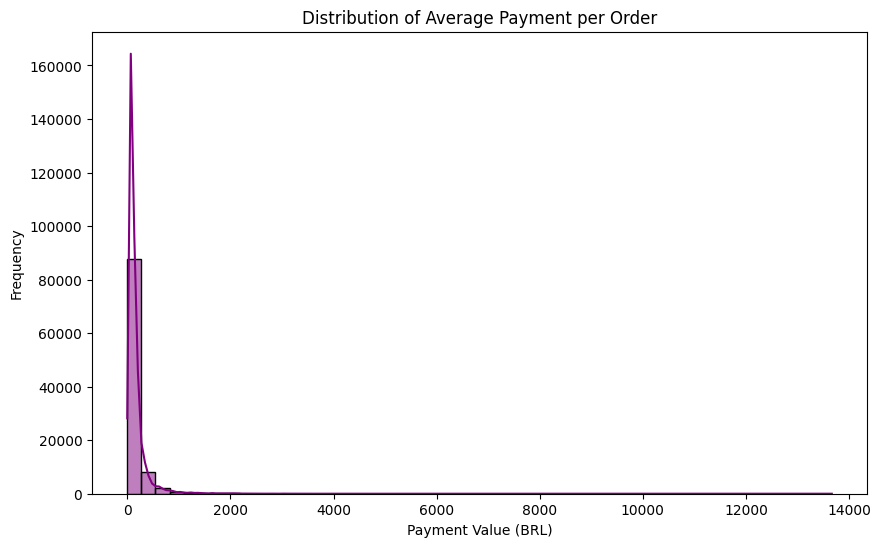

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(average_payment_cleaned, bins=50, kde=True, color='purple')
plt.title('Distribution of Average Payment per Order')
plt.xlabel('Payment Value (BRL)')
plt.ylabel('Frequency')
plt.show()

Visualisasi histogram di atas menunjukkan distribusi nilai rata-rata pembayaran untuk setiap pesanan. Tinggi batang pada histogram mewakili frekuensi atau jumlah pesanan dengan nilai rata-rata pembayaran yang berada dalam rentang tertentu. Terlihat bahwa sebagian besar pesanan memiliki nilai rata-rata pembayaran yang berada di bawah 2.000 BRL. Hal ini ditunjukkan oleh batang histogram yang paling tinggi pada rentang nilai tersebut.


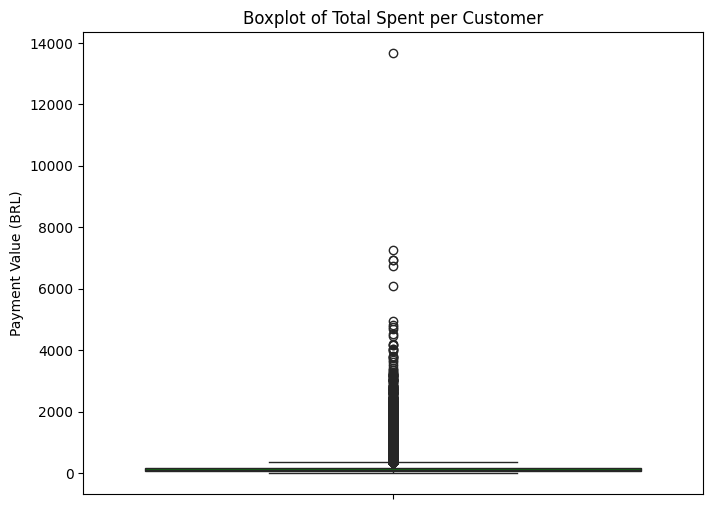

In [86]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=total_spent_per_customer_cleaned, color='green')
plt.title('Boxplot of Total Spent per Customer')
plt.ylabel('Payment Value (BRL)')
plt.show()

Visualisasi boxplot di atas menunjukkan distribusi total pengeluaran (dalam mata uang Real Brasil) untuk setiap pelanggan. Sebagian besar pelanggan memiliki total pengeluaran yang relatif rendah yang ditunjukan pada boxplot menunjukkan bahwa 50% pelanggan memiliki total pengeluaran antara sekitar 0 hingga 2.000 BRL.

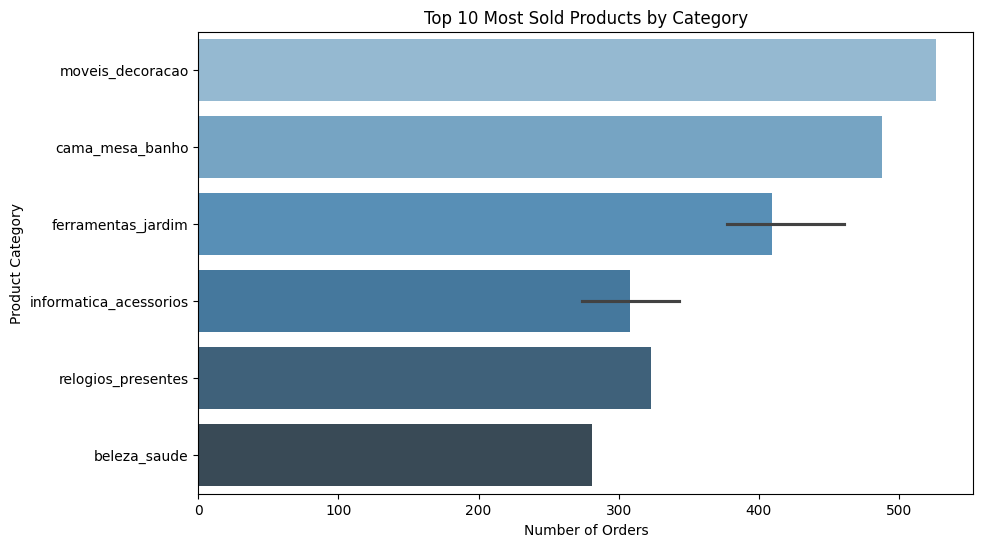

In [87]:
product_sales_detail = data_order_items_cleaned.merge(data_products_cleaned[['product_id', 'product_category_name']], on='product_id', how='left')
product_sales_cleaned = product_sales_detail.groupby('product_id')['order_item_id'].count().sort_values(ascending=False)
most_sold_products_cleaned = product_sales_cleaned.head(10).reset_index()
most_sold_products_details = most_sold_products_cleaned.merge(data_products_cleaned[['product_id', 'product_category_name']], on='product_id', how='left')

plt.figure(figsize=(10, 6))
sns.barplot(x=most_sold_products_details['order_item_id'], y=most_sold_products_details['product_category_name'], palette='Blues_d')
plt.title('Top 10 Most Sold Products by Category')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show()

Visualisasi batang (bar chart) di atas menunjukkan 10 kategori produk yang paling banyak terjual. Panjang setiap batang mewakili jumlah total pesanan untuk setiap kategori produk. Garis hitam horizontal pada ujung setiap batang menunjukkan range atau rentang variasi data. Produk Terlaris ialah Kategori produk **"moveis_decoracao" **(perabotan dan dekorasi) adalah produk yang paling banyak terjual. Ini mengindikasikan bahwa pelanggan sangat tertarik dengan produk-produk di kategori ini.

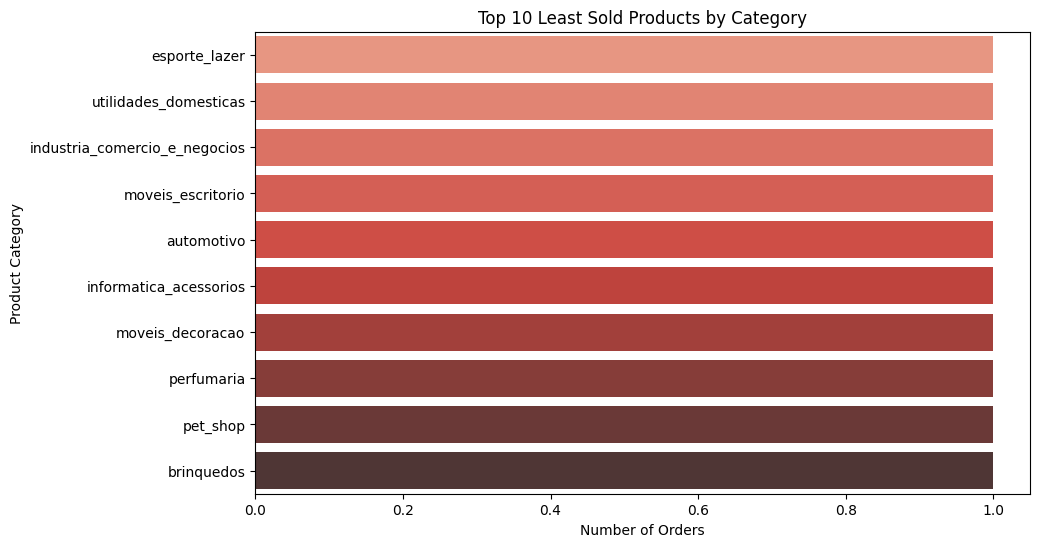

In [88]:
least_sold_products_cleaned = product_sales_cleaned.tail(10).reset_index()
least_sold_products_cleaned.columns = ['product_id', 'order_item_id']
least_sold_products_details = least_sold_products_cleaned.merge(data_products_cleaned[['product_id', 'product_category_name']], on='product_id', how='left')

plt.figure(figsize=(10, 6))
sns.barplot(x=least_sold_products_details['order_item_id'], y=least_sold_products_details['product_category_name'], palette='Reds_d')
plt.title('Top 10 Least Sold Products by Category')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show()

Visualisasi batang (bar chart) di atas menunjukkan 10 kategori produk yang paling sedikit terjual. Ini adalah daftar 10 produk paling sedikit terjual, maka batang yang lebih pendek menunjukkan produk yang kurang diminati. Produk Paling Sedikit Terjual ialah Kategori produk** "brinquedos" (mainan)** adalah produk yang paling sedikit terjual. Ini mengindikasikan bahwa pelanggan kurang tertarik dengan produk-produk di kategori ini.

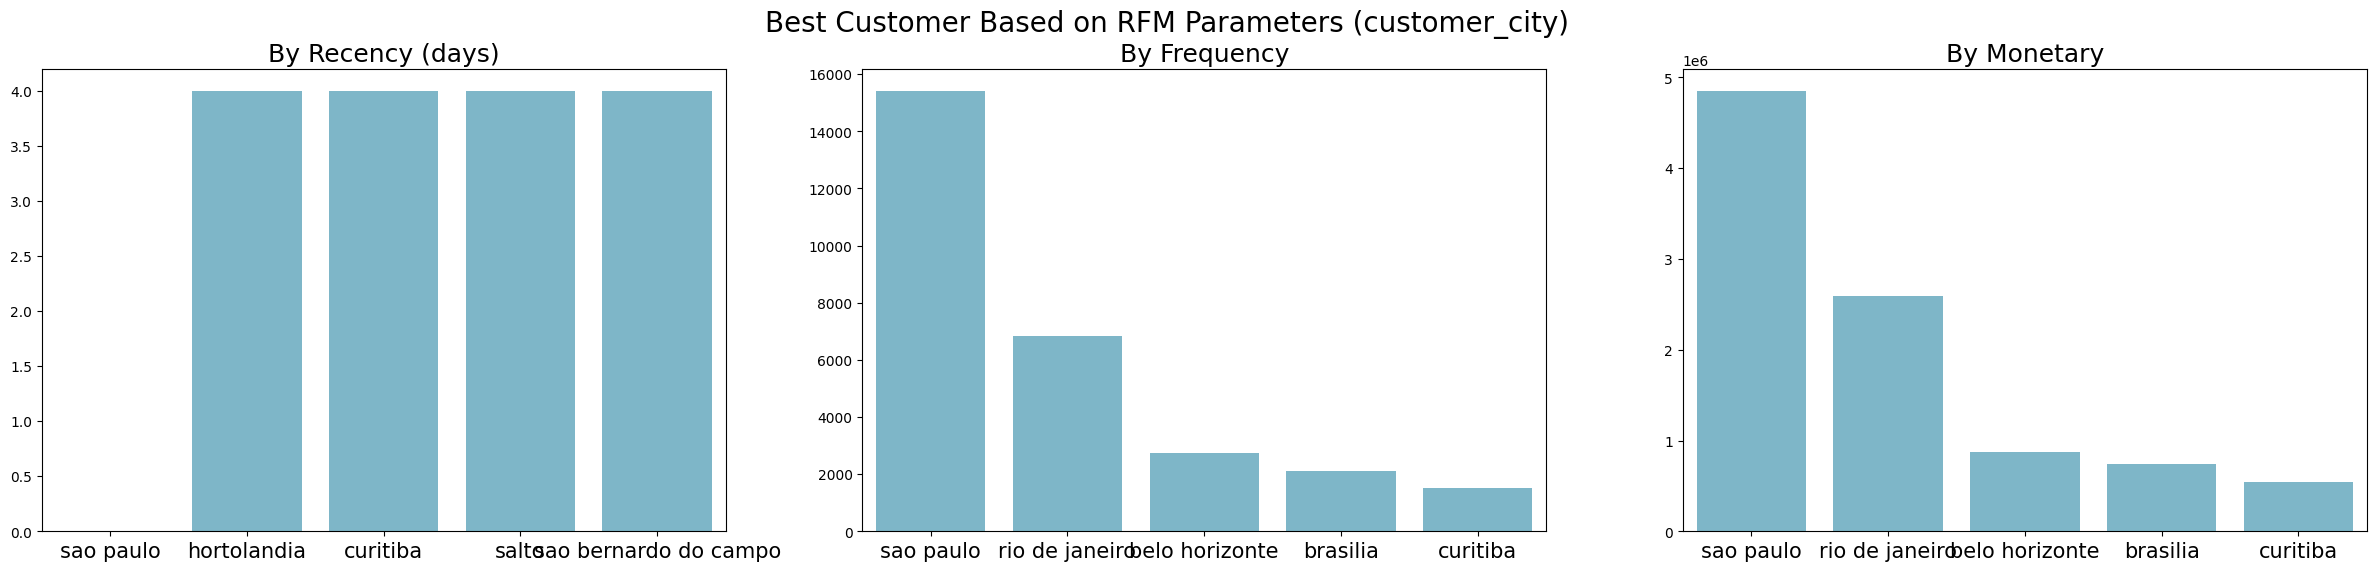

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4"] * 5

sns.barplot(y="recency", x="customer_city", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="frequency", x="customer_city", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_city", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)


plt.suptitle("Best Customer Based on RFM Parameters (customer_city)", fontsize=20)
plt.show()

- Recency: Seberapa baru pelanggan melakukan pembelian.
- Frequency: Seberapa sering pelanggan melakukan pembelian.
- Monetary: Berapa banyak uang yang dikeluarkan pelanggan.

Analisis Tiap Grafik:
* By Recency:
Grafik ini menunjukkan kota mana yang memiliki pelanggan dengan pembelian terbaru.
Kesimpulan: Kota-kota seperti Sao Paulo, Hortolandia, dan Santos memiliki pelanggan yang paling baru melakukan pembelian. Ini menunjukkan bahwa di kota-kota ini, perusahaan memiliki basis pelanggan yang aktif.

* By Frequency:
Grafik ini menunjukkan kota mana yang memiliki pelanggan dengan frekuensi pembelian tertinggi.
Kesimpulan: Sao Paulo memiliki pelanggan dengan frekuensi pembelian tertinggi, diikuti oleh Rio de Janeiro dan Belo Horizonte. Ini menunjukkan bahwa di kota-kota ini, pelanggan cenderung membeli lebih sering.

* By Monetary:
Grafik ini menunjukkan kota mana yang memiliki pelanggan dengan nilai transaksi tertinggi.
Kesimpulan: Sao Paulo memiliki pelanggan dengan nilai transaksi tertinggi, diikuti oleh Rio de Janeiro dan Belo Horizonte. Ini menunjukkan bahwa pelanggan di kota-kota ini cenderung melakukan pembelian dengan nilai yang lebih besar.

### Pertanyaan 1:

1. **Kategori produk yang memiliki total penjualan tertinggi dan terendah:**
   - **Penjualan tertinggi:** Kategori *cama_mesa_banho* dengan total penjualan sebesar 1.725.465,67.
   - **Penjualan terendah:** Kategori *seguros_e_servicos* dengan total penjualan sebesar 324,51.
   - **Kesimpulan:** Produk terkait tempat tidur, meja, dan kamar mandi adalah yang paling laris, sementara layanan seperti asuransi kurang diminati.

### Pertanyaan 2:


2. **Rata-rata penilaian produk berdasarkan kategori:**
   - **Penilaian tertinggi:** Kategori *cds_dvds_musicais* dengan rating 4,64.
   - **Penilaian terendah:** Kategori *seguros_e_servicos* dengan rating 2,50.
   - **Kesimpulan:** Kategori musik memiliki kepuasan pelanggan tertinggi, sedangkan layanan seperti asuransi perlu perbaikan dalam kualitas atau kepuasan pelanggan.

### Pertanyaan 3:


3. **Metode pembayaran yang paling sering digunakan oleh pelanggan:**
   - **Kartu kredit** adalah metode pembayaran paling banyak digunakan dengan 86.520 transaksi.
   - **Kesimpulan:** Mayoritas pelanggan lebih memilih kartu kredit sebagai metode pembayaran, mungkin karena kemudahan dan keamanannya.

### Pertanyaan 4:


4. **Kota dengan jumlah pesanan tertinggi:**
   - **São Paulo** memiliki jumlah pesanan tertinggi dengan 15.540 pesanan.
   - **Kesimpulan:** São Paulo merupakan pasar terbesar, menunjukkan potensi besar untuk meningkatkan penjualan di kota ini.


### Pertanyaan 5:

5. **Tren musiman dalam jumlah pesanan setiap bulan:**
   - **November 2017** adalah bulan dengan jumlah pesanan tertinggi (7.544 pesanan).
   - **Kesimpulan:** Ada peningkatan penjualan yang signifikan pada bulan November, yang kemungkinan dipengaruhi oleh penawaran promosi atau musim belanja akhir tahun.

### Pertanyaan 6:


6. **Waktu rata-rata pengiriman produk:**
   - Waktu pengiriman rata-rata bervariasi setiap bulan, tetapi ada beberapa bulan yang menunjukkan waktu pengiriman negatif, menandakan mungkin ada kesalahan dalam data.
   - **Kesimpulan:** Ada inkonsistensi dalam waktu pengiriman, dan beberapa bulan menunjukkan pengiriman yang sangat cepat atau bahkan negatif, yang perlu diperbaiki.


### Pertanyaan 7:


7. **Rata-rata pengeluaran pelanggan per pesanan:**
   - **Rata-rata pengeluaran per pesanan:** 158,32 dengan variasi yang besar.
   - **Kesimpulan:** Pengeluaran per pesanan bervariasi secara signifikan, menunjukkan bahwa pelanggan membeli berbagai jenis produk dengan harga yang berbeda-beda.


### Pertanyaan 8:


8. **Hubungan antara kategori produk dan nilai ulasan:**
   - Ada hubungan positif antara beberapa kategori dengan nilai ulasan tinggi, seperti *cds_dvds_musicais* yang memiliki penjualan rendah namun ulasan tinggi.
   - **Kesimpulan:** Kategori dengan volume penjualan yang rendah tidak selalu memiliki ulasan rendah, menunjukkan bahwa kualitas produk memainkan peran penting dalam penilaian pelanggan.

### Pertanyaan 9:


9. **Kategori produk yang paling banyak terjual:**
   - **Kategori terlaris:** *cama_mesa_banho* dengan 11.115 unit terjual.
   - **Kesimpulan:** Kategori terkait tempat tidur dan perabot rumah tangga sangat diminati, menjadi kategori produk yang paling banyak terjual.

### Pertanyaan 10:

10. **Perbedaan dalam waktu pengiriman antara berbagai metode pembayaran:**
    - **Tidak ada perbedaan signifikan** dalam waktu pengiriman berdasarkan metode pembayaran yang digunakan.
    - **Kesimpulan:** Waktu pengiriman tidak bergantung pada metode pembayaran, menunjukkan bahwa faktor logistik lebih berpengaruh daripada metode pembayaran pelanggan.

In [90]:
for name, df in zip(eccomerce_cleaned, data_eccomerce_cleaned):
    print(f"DataFrame: {name}")
    print(df.dtypes)
    print("\n")

DataFrame: customers
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


DataFrame: geolocation
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


DataFrame: order_items
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


DataFrame: order_payments
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


DataFrame: order_reviews
review_id             

In [91]:

merged_data = data_orders_cleaned.merge(data_customers_cleaned, on='customer_id', how='left')
merged_data = merged_data.merge(data_order_items_cleaned, on='order_id', how='left')
merged_data = merged_data.merge(data_order_payments_cleaned, on='order_id', how='left')
merged_data = merged_data.merge(data_order_reviews_cleaned, on='order_id', how='left')
merged_data = merged_data.merge(data_products_cleaned[['product_id', 'product_category_name']], on='product_id', how='left')

important_columns = [
    'order_id', 'customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
    'product_id', 'product_category_name', 'order_item_id', 'price', 'freight_value', 
    'payment_type', 'payment_value', 'review_score', 'order_status', 'order_purchase_timestamp', 
    'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date'
]

final_data = merged_data[important_columns]
final_data.to_csv('dashboard/main_data.csv', index=False)
